In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv("C:/Users/Ayush Gupta/Desktop/Semester 6/ML/ML_Practicals/Housing_dataset.csv")
data.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


<AxesSubplot:xlabel='area', ylabel='price'>

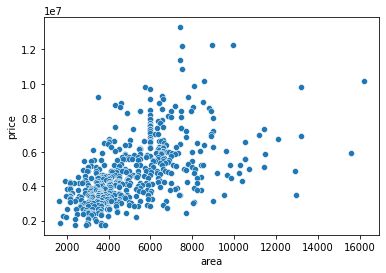

In [9]:
# Understand your data by observing the correlation between the feature and the target variable using scatter plot

sns.scatterplot(x=data['area'], y=data['price'])

In [10]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


In [11]:
# Divide the dataset into a training set and a test set. Use the
# “train_test_split” method of the sklearn library to create the training set and
# the test set (70:30)

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Create the linear regression model with the training set
# Make predictions using the test set.
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
# Find the coefficient and slope of the fitted regression line
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2: ', model.score(X_test, y_test))


Coefficient:  [0.56618649]
Intercept:  0.12545879583517747
R^2:  0.2583140345296


In [14]:
# Find the accuracy of the model, and use the most popular metric for linear
# regression called “R-squared”
print('R^2: ', model.score(X_test, y_test))

R^2:  0.2583140345296


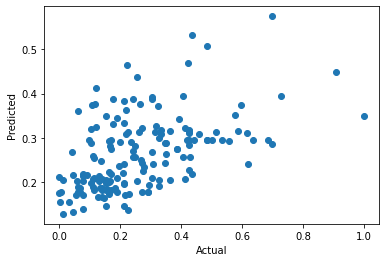

In [15]:
# Compare the actual and predicted values by plotting a scatter graph
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()